## Bài 3

### 3.1 Thu thập dữ liệu

#### 3.1.1 - Bạn hãy viết code cào dữ liệu từ trang web http://quotes.toscrape.com/, lưu kết quả vào 1 file tương ứng (kq.txt) và vẽ sơ đồ mô tả ngắn gọn về cấu trúc của trang Web trên?

In [11]:
import requests
from bs4 import BeautifulSoup

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    with open('kq.txt', 'w', encoding='utf-8') as file:
        file.write(str(soup))
    print("Dữ liệu đã được lưu vào kq.txt.")
else:
    print(f"Không thể truy cập trang web, mã lỗi: {response.status_code}")

Dữ liệu đã được lưu vào kq.txt.


- Vẽ sơ đồ mô tả ngắn gọn về cấu trúc của trang Web trên?

```
<div class="quote">
├── <span class="text">“Nội dung trích dẫn...”</span>
├── <span>
│   └── by <small class="author">Tên tác giả</small>
│       └── <a href="/author/Tac-Gia">(about)</a>
├── <div class="tags">
│   ├── Tags:
│   ├── <meta class="keywords" content="tag1,tag2,...">
│   ├── <a class="tag" href="/tag/tag1/page/1/">tag1</a>
│   ├── <a class="tag" href="/tag/tag2/page/1/">tag2</a>
│   └── ...
</div>
```

#### 3.1.2.a Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’, hiển thị giá trị biến 'result’ ra màn hình?

In [15]:
result = soup.find_all("div", class_="quote")
print("Tìm được", len(result), "thẻ quote:")
for r in result:
    print(r.prettify(), end="\n\n")

Tìm được 10 thẻ quote:
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">
  “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
 </span>
 <span>
  by
  <small class="author" itemprop="author">
   Albert Einstein
  </small>
  <a href="/author/Albert-Einstein">
   (about)
  </a>
 </span>
 <div class="tags">
  Tags:
  <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
  <a class="tag" href="/tag/change/page/1/">
   change
  </a>
  <a class="tag" href="/tag/deep-thoughts/page/1/">
   deep-thoughts
  </a>
  <a class="tag" href="/tag/thinking/page/1/">
   thinking
  </a>
  <a class="tag" href="/tag/world/page/1/">
   world
  </a>
 </div>
</div>


<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">
  “It is our choices, Harry, that show what we truly are, far more than ou

#### 3.1.2.b Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small"  với class là "author" và in kết quả ra màn hình?

In [19]:
for quote in result:
    author = quote.find('small', class_='author')
    if author:
        print(author.text.strip())


Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


#### 3.1.2.c Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in ra màn hình các nội dung (1đ) 
- Tên tác giả 
- Đường link của tác giả 
- Ngày tháng năm sinh 
- Và câu nói nổi tiếng của tác giả 

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
from time import sleep

def tacgiaLink(soup):
    base = "http://quotes.toscrape.com"
    ds = []
    for q in soup.find_all("div", class_="quote"):
        ten = q.find("small", class_="author").text # Lấy tên tác giả
        link = base + q.find("a")["href"]  # Lấy link trang chi tiết tác giả
        cau = q.find("span", class_="text").text# Lấy nội dung câu nói
        
        sleep(1)
        res = requests.get(link)
        tg = BeautifulSoup(res.text, "html.parser")
        ns = tg.find("span", class_="author-born-date").text# Lấy ngày sinh tác giả
        noi = tg.find("span", class_="author-born-location").text# Thêm thông tin vào danh sách
        
        ds.append([ten, link, f"{ns} {noi}", cau])
    return ds

#### 3.1.2.d Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1 dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang web trên một cách tự động theo code của các ý trên?

In [5]:
def save_du_lieu(max=100):
    base = "http://quotes.toscrape.com"
    all = []
    page = 1
    
    while len(all) < max:
        res = requests.get(f"{base}/page/{page}/")
        soup = BeautifulSoup(res.text, "html.parser")
        if not soup.find("div", class_="quote"): break
        all.extend(tacgiaLink(soup))
        page += 1
        sleep(2)
    with open("Quote.csv", "w", encoding="utf-8", newline="") as f:
        csv.writer(f).writerows([["Tác giả", "Link", "Ngày sinh", "Câu nói"]] + all[:max])
    
    print(f"Đã lưu {len(all[:max])} câu nói")
if __name__ == "__main__":
    save_du_lieu()

Đã lưu 100 câu nói


### 3.2. Khai phá dữ liệu

#### 3.2.1. Xử lý dữ liệu- Data Imputation

#### - Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?

In [194]:
import pandas as pd
df_data = pd.read_csv('Quote.csv')# df_data

In [196]:
# sử dụng lệnh dưới khi bạn đã chạy 1 lần rồi
#df_data = df_data.drop('STT', axis=1)
#df_data.head(10)

In [198]:
#thêm vào Trường STT và điền tự động dữ liệu của trường này
df_data.insert(0, "STT", range(1, len(df_data) + 1))
df_data = df_data[["STT", "Tác giả", "Link", "Ngày sinh", "Câu nói"]]
df_data[:10]

,STT,Tác giả,Link,Ngày sinh,Câu nói
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879 in Ulm, Germany",“The world as we have created it is a process ...
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965 in Yate, South Gloucestershire, ...","“It is our choices, Harry, that show what we t..."
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879 in Ulm, Germany",“There are only two ways to live your life. On...
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775 in Steventon Rectory, Hampsh...","“The person, be it gentleman or lady, who has ..."
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926 in The United States","“Imperfection is beauty, madness is genius and..."
5,6,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879 in Ulm, Germany",“Try not to become a man of success. Rather be...
6,7,André Gide,http://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869 in Paris, France",“It is better to be hated for what you are tha...
7,8,Thomas A. Edison,http://quotes.toscrape.com/author/Thomas-A-Edison,"February 11, 1847 in Milan, Ohio, The United S...","“I have not failed. I've just found 10,000 way..."
8,9,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,"October 11, 1884 in The United States",“A woman is like a tea bag; you never know how...
9,10,Steve Martin,http://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945 in Waco, Texas, The United States","“A day without sunshine is like, you know, nig..."


#### - Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?

In [201]:
# hoặc có thể dùng hàm dưới để kiểm tra xem có thiếu dữ liệu nào không, nếu trả về False là không bị thiếu 
# nếu trả về True là có giá trị bị thiếu
df_data['Ngày sinh'].isnull().values.any()

False

- Kết quả trả về False nên Trường Ngày sinh của bảng dữ liệu không bị thiếu

#### - Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả? 

- Vì trong trang web cào không có dữ liệu về ngày mất của của các tác giả nên em sử dụng tra cứu trên Wikidata API về tuổi của người đã mất và tính tuổi của người còn sống theo năm hiện tại bằng cách "lấy năm mất - năm sinh của tác giả"

In [206]:
import pandas as pd
import re
import requests
from datetime import datetime
from functools import lru_cache

def chuyen_doi_ngay_sinh(ngay_sinh):
    """
    Lấy phần ngày/tháng/năm đầu tiên trong chuỗi, ví dụ 'August 14, 1945' từ chuỗi dài.
    Nếu không tìm thấy phần hợp lệ, trả về None.
    """
    if not isinstance(ngay_sinh, str):
        return None
    match = re.match(r"(\w+\s\d{1,2},\s\d{4})", ngay_sinh)
    return match.group(1) if match else None

In [208]:
@lru_cache(None)
def lay_nam_mat(tac_gia):
    try:
        r = requests.get("https://www.wikidata.org/w/api.php",
                         params={'action':'wbsearchentities', 'language':'en', 'format':'json', 'search':tac_gia},
                         timeout=10)
        r.raise_for_status()
        data = r.json()

        # Ưu tiên các mô tả phù hợp văn học / triết học
        for item in data.get('search', []):
            desc = item.get('description', '').lower()
            if any(k in desc for k in ['writer', 'philosopher', 'novelist', 'author']):
                id_tg = item['id']
                break
        else:
            id_tg = data['search'][0]['id'] if data.get('search') else None

        if not id_tg:
            return None

        # Truy vấn năm mất
        query = f"SELECT (YEAR(?date) AS ?year) WHERE {{ wd:{id_tg} wdt:P570 ?date }} LIMIT 1"
        r2 = requests.get("https://query.wikidata.org/sparql",
                          params={'query': query, 'format': 'json'},
                          headers={"Accept": "application/json"},
                          timeout=10)
        r2.raise_for_status()
        bindings = r2.json().get('results', {}).get('bindings', [])
        if bindings:
            return int(bindings[0]['year']['value'])
        return None
    except Exception as e:
        print(f"Lỗi với {tac_gia}: {e}")
        return None


In [210]:
# Hàm tính tuổi
def tinh_tuoi(row, nam_mat_map, nam_hien_tai):
    """
    Tính tuổi dựa trên năm sinh và năm mất.
    Nếu không có năm mất, tính tuổi bằng năm hiện tại (2025) - năm sinh.
    """
    if pd.isnull(row['Ngày sinh']):
        return None
    nam_sinh = row['Ngày sinh'].year
    nam_mat = nam_mat_map.get(row['Tác giả'])
    return (nam_mat if nam_mat is not None else nam_hien_tai) - nam_sinh

# Chuẩn hóa cột ngày sinh
df_data['Ngày sinh'] = df_data['Ngày sinh'].apply(chuyen_doi_ngay_sinh)
df_data['Ngày sinh'] = pd.to_datetime(df_data['Ngày sinh'], errors='coerce')

# Lấy danh sách tác giả duy nhất và truy vấn năm mất
ds_tac_gia = df_data['Tác giả'].dropna().unique()
nam_mat_map = {tg: lay_nam_mat(tg) for tg in ds_tac_gia}

# Tính tuổi cho từng dòng
nam_hien_tai = datetime.now().year
df_data['Tuổi'] = df_data.apply(lambda row: tinh_tuoi(row, nam_mat_map, nam_hien_tai), axis=1)

df_data_1 = df_data
df_data_1

,STT,Tác giả,Link,Ngày sinh,Câu nói,Tuổi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",60
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",42
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36
...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,90
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,89
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,75
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87


### 3.2.2. Khám phá dữ liệu- Data Exploration (10 điểm):  
- Bạn cần khám phá dữ liệu để hiển thị một số thông tin thống kê và phân tích của tập dữ liệu đã cho. Chẳng hạn như: 

In [212]:
# Lấy số dòng với số cột có trong bộ dữ liệu
a = df_data_1.shape
print(a) #khi xuất a output: (100, 6) có thể hiểu bảng dữ liệu có 100 dòng và 6 cột
print(f"Bảng dữ liệu có {a[0]} dòng dữ liệu và {a[1]} cột dữ liệu")

(100, 6)
Bảng dữ liệu có 100 dòng dữ liệu và 6 cột dữ liệu


In [214]:
#Xem thông tin về Index, kiểu dữ liệu và dung lượng của dữ liệu
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STT        100 non-null    int64         
 1   Tác giả    100 non-null    object        
 2   Link       100 non-null    object        
 3   Ngày sinh  100 non-null    datetime64[ns]
 4   Câu nói    100 non-null    object        
 5   Tuổi       100 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ KB


#### - Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu ?
##### + Thống kê số lượng tác giả
##### + Thống kê tác giả đó có bao nhiêu câu quote tương ứng trong bộ dữ liệu
##### + Thống kê số lượng câu nói nổi tiếng của mỗi tác giả trong bộ dữ liệu

In [217]:
# Thống kê số lượng tác giả
from collections import Counter
list_name = df_data_1['Tác giả'].tolist()
list_quote = df_data_1['Câu nói'].tolist()

author_counts = Counter(list_name)# Đếm số lượng tác giả
new_dict = dict(author_counts) # thống kê số câu nói mỗi người

print(f"Có {len(new_dict)} tác giả trong bộ dữ liệu.\n")

print("Danh sách tác giả:")
for author in new_dict:
    print(f"\t{author}")

Có 50 tác giả trong bộ dữ liệu.

Danh sách tác giả:
	Albert Einstein
	J.K. Rowling
	Jane Austen
	Marilyn Monroe
	André Gide
	Thomas A. Edison
	Eleanor Roosevelt
	Steve Martin
	Bob Marley
	Dr. Seuss
	Douglas Adams
	Elie Wiesel
	Friedrich Nietzsche
	Mark Twain
	Allen Saunders
	Pablo Neruda
	Ralph Waldo Emerson
	Mother Teresa
	Garrison Keillor
	Jim Henson
	Charles M. Schulz
	William Nicholson
	Jorge Luis Borges
	George Eliot
	George R.R. Martin
	C.S. Lewis
	Martin Luther King Jr.
	James Baldwin
	Haruki Murakami
	Alexandre Dumas fils
	Stephenie Meyer
	Ernest Hemingway
	Helen Keller
	George Bernard Shaw
	Charles Bukowski
	Suzanne Collins
	J.R.R. Tolkien
	Alfred Tennyson
	Terry Pratchett
	J.D. Salinger
	George Carlin
	John Lennon
	W.C. Fields
	Ayn Rand
	Jimi Hendrix
	J.M. Barrie
	E.E. Cummings
	Khaled Hosseini
	Harper Lee
	Madeleine L'Engle


In [219]:
# Thống kê tác giả đó có bao nhiêu câu quote tương ứng trong bộ dữ liệu    
print("\nDanh sách các câu nói:")
for i, (author, quote) in enumerate(zip(list_name, list_quote), start=1):
    print(f"{i}. {author}: \"{quote}\"")


Danh sách các câu nói:
1. Albert Einstein: "“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”"
2. J.K. Rowling: "“It is our choices, Harry, that show what we truly are, far more than our abilities.”"
3. Albert Einstein: "“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”"
4. Jane Austen: "“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"
5. Marilyn Monroe: "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
6. Albert Einstein: "“Try not to become a man of success. Rather become a man of value.”"
7. André Gide: "“It is better to be hated for what you are than to be loved for what you are not.”"
8. Thomas A. Edison: "“I have not failed. I've just found 10,000 ways that won't work.”"
9. Eleanor Roosevelt: "“A woman is like a te

In [221]:
# Thống kê số lượng câu nói nổi tiếng của mỗi tác giả trong bộ dữ liệu (sắp xếp giảm dần)
print("\nThống kê số câu nói nổi tiếng theo tác giả:")
for author, count in sorted(new_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"- {author} có: {count} câu nói nổi tiếng trong bộ dữ liệu")


Thống kê số câu nói nổi tiếng theo tác giả:
- Albert Einstein có: 10 câu nói nổi tiếng trong bộ dữ liệu
- J.K. Rowling có: 9 câu nói nổi tiếng trong bộ dữ liệu
- Marilyn Monroe có: 7 câu nói nổi tiếng trong bộ dữ liệu
- Dr. Seuss có: 6 câu nói nổi tiếng trong bộ dữ liệu
- Mark Twain có: 6 câu nói nổi tiếng trong bộ dữ liệu
- Jane Austen có: 5 câu nói nổi tiếng trong bộ dữ liệu
- C.S. Lewis có: 5 câu nói nổi tiếng trong bộ dữ liệu
- Bob Marley có: 3 câu nói nổi tiếng trong bộ dữ liệu
- Eleanor Roosevelt có: 2 câu nói nổi tiếng trong bộ dữ liệu
- Ralph Waldo Emerson có: 2 câu nói nổi tiếng trong bộ dữ liệu
- Mother Teresa có: 2 câu nói nổi tiếng trong bộ dữ liệu
- George R.R. Martin có: 2 câu nói nổi tiếng trong bộ dữ liệu
- Ernest Hemingway có: 2 câu nói nổi tiếng trong bộ dữ liệu
- Charles Bukowski có: 2 câu nói nổi tiếng trong bộ dữ liệu
- Suzanne Collins có: 2 câu nói nổi tiếng trong bộ dữ liệu
- André Gide có: 1 câu nói nổi tiếng trong bộ dữ liệu
- Thomas A. Edison có: 1 câu nói nổ

#### - Thống kê về năm sinh và độ tuổi của các tác giả ?
##### + Thống kê về năm sinh tác giả
##### + Thống kê về độ tuổi tác giả
##### + Tác giả có độ tuổi nhỏ nhất và lớn nhất

In [224]:
from datetime import datetime
import pandas as pd

df_data_1['Ngày sinh'] = pd.to_datetime(df_data_1['Ngày sinh'], errors='coerce') # Đảm bảo cột 'Ngày sinh' có kiểu datetime
data_namsinh = df_data[['Tác giả', 'Ngày sinh']].drop_duplicates()
data_namsinh['Năm sinh'] = data_namsinh['Ngày sinh'].dt.year

nam_sinh_theo_tac_gia = dict(zip(data_namsinh['Tác giả'], data_namsinh['Năm sinh']))# Tạo dict {Tác giả: Năm sinh}

du_lieu_tuoi = df_data[['Tác giả', 'Tuổi']].drop_duplicates()# Lấy tuổi duy nhất theo từng tác giả

tuoi_theo_tac_gia = dict(zip(du_lieu_tuoi['Tác giả'], du_lieu_tuoi['Tuổi']))# Tạo dict {Tác giả: Tuổi}

print("Năm sinh theo tác giả:")
nam_sinh_theo_tac_gia

Năm sinh theo tác giả:


{'Albert Einstein': 1879,
 'J.K. Rowling': 1965,
 'Jane Austen': 1775,
 'Marilyn Monroe': 1926,
 'André Gide': 1869,
 'Thomas A. Edison': 1847,
 'Eleanor Roosevelt': 1884,
 'Steve Martin': 1945,
 'Bob Marley': 1945,
 'Dr. Seuss': 1904,
 'Douglas Adams': 1952,
 'Elie Wiesel': 1928,
 'Friedrich Nietzsche': 1844,
 'Mark Twain': 1835,
 'Allen Saunders': 1899,
 'Pablo Neruda': 1904,
 'Ralph Waldo Emerson': 1803,
 'Mother Teresa': 1910,
 'Garrison Keillor': 1942,
 'Jim Henson': 1936,
 'Charles M. Schulz': 1922,
 'William Nicholson': 1948,
 'Jorge Luis Borges': 1899,
 'George Eliot': 1819,
 'George R.R. Martin': 1948,
 'C.S. Lewis': 1898,
 'Martin Luther King Jr.': 1929,
 'James Baldwin': 1924,
 'Haruki Murakami': 1949,
 'Alexandre Dumas fils': 1824,
 'Stephenie Meyer': 1973,
 'Ernest Hemingway': 1899,
 'Helen Keller': 1880,
 'George Bernard Shaw': 1856,
 'Charles Bukowski': 1920,
 'Suzanne Collins': 1962,
 'J.R.R. Tolkien': 1892,
 'Alfred Tennyson': 1809,
 'Terry Pratchett': 1948,
 'J.D. Sal

In [226]:
print("\nTuổi theo tác giả:")
tuoi_theo_tac_gia


Tuổi theo tác giả:


{'Albert Einstein': 76,
 'J.K. Rowling': 60,
 'Jane Austen': 42,
 'Marilyn Monroe': 36,
 'André Gide': 82,
 'Thomas A. Edison': 84,
 'Eleanor Roosevelt': 78,
 'Steve Martin': 80,
 'Bob Marley': 36,
 'Dr. Seuss': 87,
 'Douglas Adams': 49,
 'Elie Wiesel': 88,
 'Friedrich Nietzsche': 56,
 'Mark Twain': 75,
 'Allen Saunders': 87,
 'Pablo Neruda': 69,
 'Ralph Waldo Emerson': 79,
 'Mother Teresa': 87,
 'Garrison Keillor': 83,
 'Jim Henson': 54,
 'Charles M. Schulz': 78,
 'William Nicholson': 77,
 'Jorge Luis Borges': 87,
 'George Eliot': 61,
 'George R.R. Martin': 77,
 'C.S. Lewis': 65,
 'Martin Luther King Jr.': 39,
 'James Baldwin': 63,
 'Haruki Murakami': 76,
 'Alexandre Dumas fils': 71,
 'Stephenie Meyer': 52,
 'Ernest Hemingway': 62,
 'Helen Keller': 88,
 'George Bernard Shaw': 94,
 'Charles Bukowski': 74,
 'Suzanne Collins': 63,
 'J.R.R. Tolkien': 81,
 'Alfred Tennyson': 83,
 'Terry Pratchett': 67,
 'J.D. Salinger': 91,
 'George Carlin': 71,
 'John Lennon': 40,
 'W.C. Fields': 66,
 'Ay

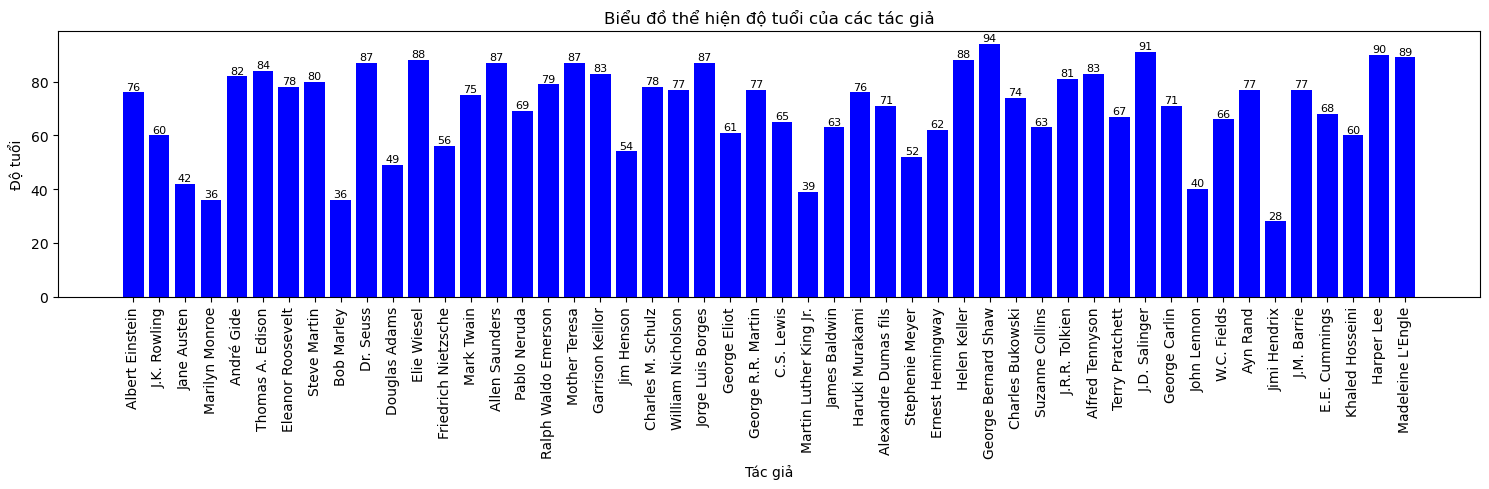

In [228]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có dict tuoi_theo_tac_gia từ code trước
authors = list(tuoi_theo_tac_gia.keys())
ages = list(tuoi_theo_tac_gia.values())
plt.figure(figsize=(15, 5))
plt.bar(authors, ages, color='blue')
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện độ tuổi của các tác giả')
plt.xlabel('Tác giả')
plt.ylabel('Độ tuổi')
for i, age in enumerate(ages):
    plt.text(i, age + 1, str(age), ha='center', fontsize=8)
plt.tight_layout()
plt.show()

In [230]:
tg_min = min(tuoi_theo_tac_gia, key=tuoi_theo_tac_gia.get)
min_age = tuoi_theo_tac_gia[tg_min]

tg_max = max(tuoi_theo_tac_gia, key=tuoi_theo_tac_gia.get)
max_age = tuoi_theo_tac_gia[tg_max]

print(f"Tác giả nhỏ tuổi nhất: \033[94m{tg_min} ({min_age} tuổi)\033[0m")
print(f"Tác giả lớn tuổi nhất: \033[94m{tg_max} ({max_age} tuổi)\033[0m")

Tác giả nhỏ tuổi nhất: Jimi Hendrix (28 tuổi)
Tác giả lớn tuổi nhất: George Bernard Shaw (94 tuổi)


#### - Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, … ?

In [232]:
import matplotlib.pyplot as plt

df_data_1['Độ dài câu'] = df_data_1['Câu nói'].str.len()
df_data_1['Số từ'] = df_data_1['Câu nói'].str.split().apply(len)

# Tìm câu dài nhất và câu ngắn nhất
cau_dai_nhat = df_data_1.loc[df_data_1['Độ dài câu'].idxmax()]
cau_ngan_nhat = df_data_1.loc[df_data_1['Độ dài câu'].idxmin()]

print("Câu dài nhất:")
print(cau_dai_nhat['Câu nói'])
print(f"Tác giả: {cau_dai_nhat['Tác giả']} - Độ dài: {cau_dai_nhat['Độ dài câu']} ký tự\n")

print("Câu ngắn nhất:")
print(cau_ngan_nhat['Câu nói'])
print(f"Tác giả: {cau_ngan_nhat['Tác giả']} - Độ dài: {cau_ngan_nhat['Độ dài câu']} ký tự\n")

# Trung bình số từ mỗi câu
so_tu_trung_binh = df_data['Số từ'].mean()
print(f"Số từ trung bình mỗi câu: {so_tu_trung_binh:.2f}")

Câu dài nhất:
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and mos

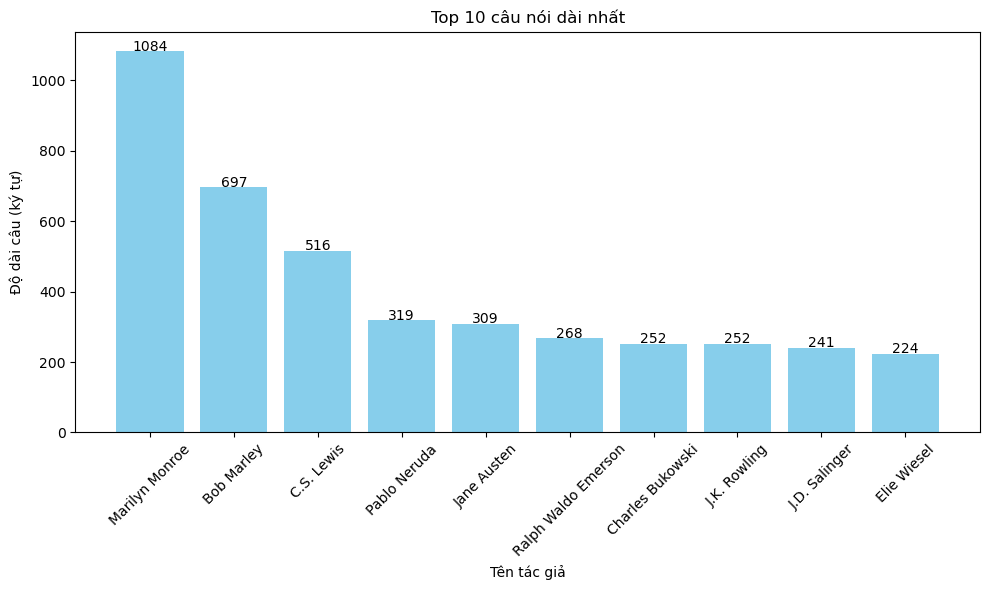

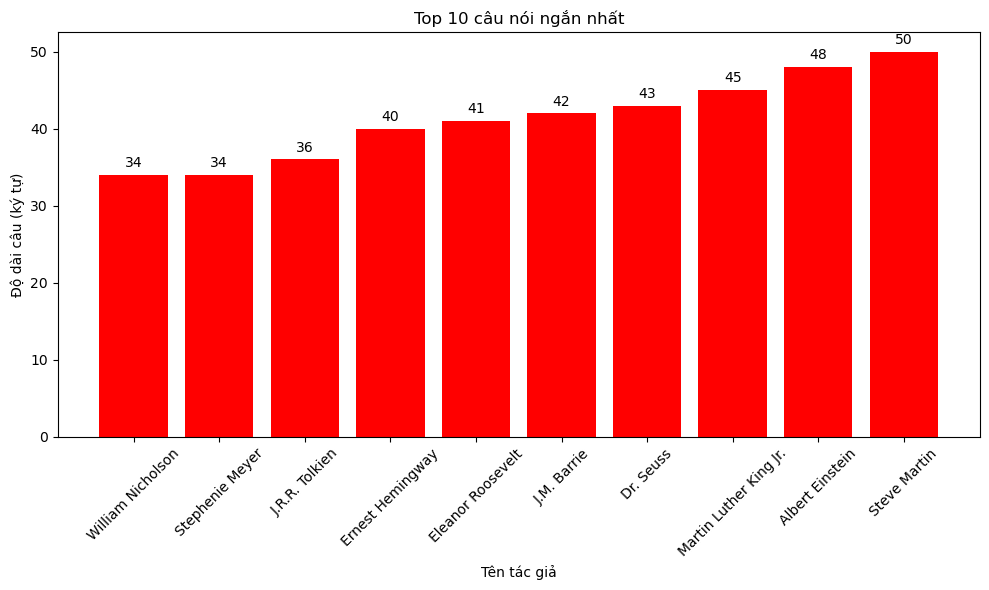

In [234]:
# Vẽ biểu đồ top 10 câu dài nhất
top10_cau_dai_nhat = df_data_1.nlargest(10, 'Độ dài câu')

plt.figure(figsize=(10,6))
plt.bar(top10_cau_dai_nhat['Tác giả'], top10_cau_dai_nhat['Độ dài câu'], color='skyblue')
plt.title('Top 10 câu nói dài nhất')
plt.xlabel('Tên tác giả')
plt.ylabel('Độ dài câu (ký tự)')
plt.xticks(rotation=45)
for i, v in enumerate(top10_cau_dai_nhat['Độ dài câu']):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ top 10 câu ngắn nhất
top10_cau_ngan_nhat = df_data_1.nsmallest(10, 'Độ dài câu')
plt.figure(figsize=(10,6))
plt.bar(top10_cau_ngan_nhat['Tác giả'], top10_cau_ngan_nhat['Độ dài câu'], color='red')
plt.title('Top 10 câu nói ngắn nhất')
plt.xlabel('Tên tác giả')
plt.ylabel('Độ dài câu (ký tự)')
plt.xticks(rotation=45)
for i, v in enumerate(top10_cau_ngan_nhat['Độ dài câu']):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

#### - Thống kê về các từ được sử dụng trong các câu nói ? 

In [236]:
import collections
import string

danh_sach_tu = []
for cau_noi in list_quote:
    cau_noi = cau_noi.lower()    # Chuyển về chữ thường
    # Loại bỏ dấu câu
    for dau_cau in string.punctuation:
        cau_noi = cau_noi.replace(dau_cau, '')
    # Tách câu thành từ và thêm vào danh sách
    cac_tu = cau_noi.split()
    danh_sach_tu.extend(cac_tu)

# Đếm số lần xuất hiện từng từ
dem_tu = collections.Counter(danh_sach_tu)
dem_tu

Counter({'you': 84,
         'to': 71,
         'is': 69,
         'the': 63,
         'a': 62,
         'of': 48,
         'and': 48,
         'i': 39,
         'it': 36,
         'not': 33,
         'be': 29,
         'that': 29,
         'in': 26,
         'but': 25,
         'love': 19,
         'can': 19,
         'your': 18,
         'who': 18,
         'will': 18,
         'have': 17,
         'what': 16,
         'are': 16,
         'as': 14,
         'all': 14,
         'if': 14,
         'its': 13,
         'up': 13,
         'with': 13,
         'my': 13,
         '“the': 12,
         'one': 12,
         'or': 12,
         'for': 12,
         'never': 12,
         'no': 12,
         'more': 11,
         '“i': 11,
         'her': 11,
         'she': 11,
         'think': 11,
         'make': 10,
         'so': 10,
         'when': 10,
         'than': 9,
         'only': 9,
         'like': 9,
         'because': 9,
         'from': 9,
         'do': 9,
         'we': 8,
    

In [283]:
# Lấy 10 từ xuất hiện nhiều nhất
max_10 = dem_tu.most_common(10)
print("10 từ được sử dụng nhiều nhất:")
for tu, so_lan in max_10:
    print(f"\t{tu}: {so_lan}")
    
min_10 = sorted(dem_tu.items(), key=lambda x: x[1])[:10]
print("1 vài từ được sử dụng ít:")
for tu, so_lan in min_10:
    print(f"\t{tu}: {so_lan}")

10 từ được sử dụng nhiều nhất:
	you: 84
	to: 71
	is: 69
	the: 63
	a: 62
	of: 48
	and: 48
	i: 39
	it: 36
	not: 33
1 vài từ được sử dụng ít:
	created: 1
	process: 1
	cannot: 1
	changed: 1
	changing: 1
	choices: 1
	show: 1
	far: 1
	abilities”: 1
	miracle: 1


#### - Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng ?
##### + Số lượng câu nói nổi tiếng của các tác giả
##### + Top 10 từ được sử dụng nhiều nhất trong các câu nói (biểu thị sự ưa thích sử dụng từ trong các câu quote của các tác giả)

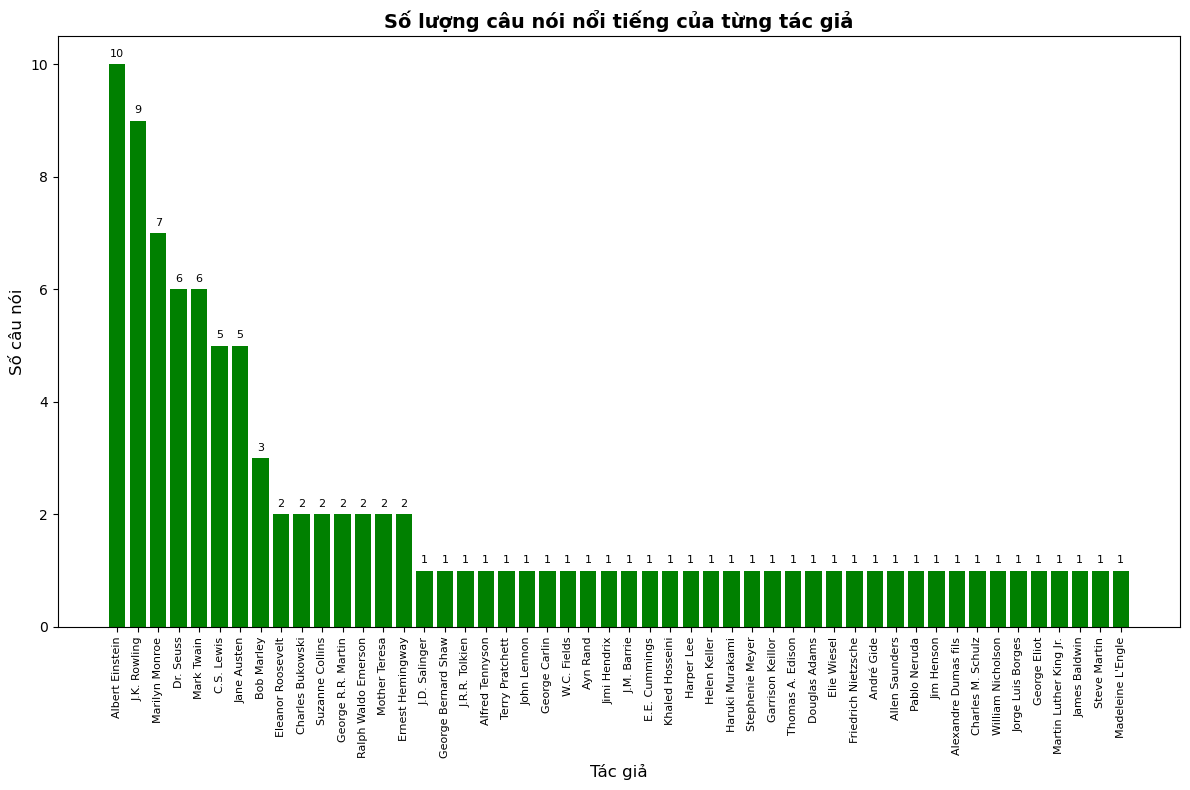

In [286]:
# Số lượng câu nói nổi tiếng của các tác giả
import pandas as pd
import matplotlib.pyplot as plt

# Thống kê số câu nói theo từng tác giả
so_cau_noi = df_data_1['Tác giả'].value_counts()

plt.figure(figsize=(12, 8))
cot = plt.bar(so_cau_noi.index, so_cau_noi.values, color='green')

# Hiển thị số lượng trên đầu mỗi cột
for c in cot:
    so_luong = c.get_height()
    plt.text(c.get_x() + c.get_width()/2, so_luong + 0.1, str(so_luong), ha='center', va='bottom', fontsize=8)

plt.title('Số lượng câu nói nổi tiếng của từng tác giả', fontsize=14, fontweight='bold')
plt.xlabel('Tác giả', fontsize=12)
plt.ylabel('Số câu nói', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

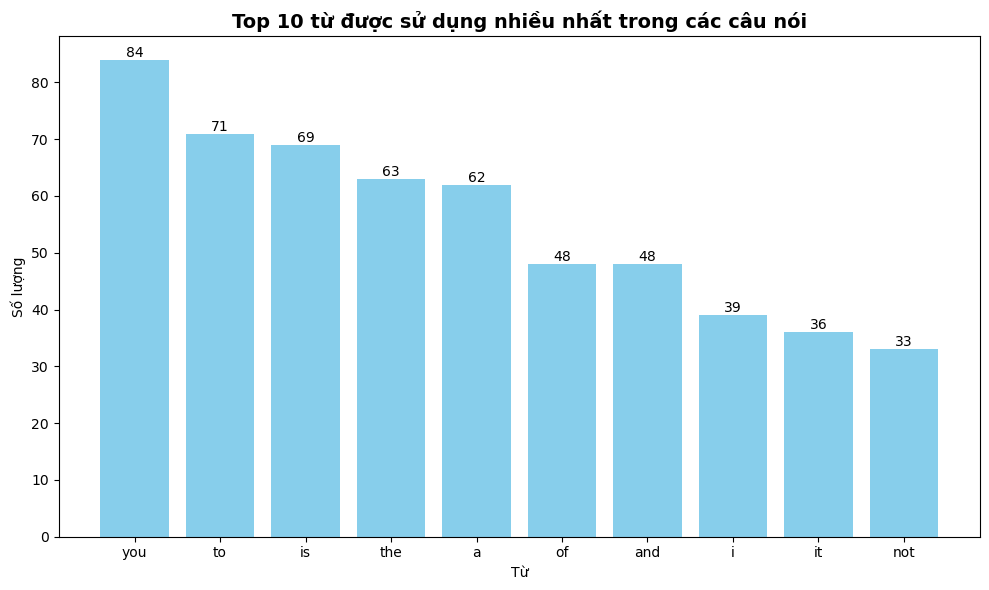

In [294]:
#Top 10 từ được sử dụng nhiều nhất trong các câu nói
tu_top = [tu for tu, sl in max_10]
sl_top = [sl for tu, sl in max_10]

plt.figure(figsize=(10,6))
bars = plt.bar(tu_top, sl_top, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center', fontsize=10)

plt.title('Top 10 từ được sử dụng nhiều nhất trong các câu nói', fontsize=14, fontweight='bold')
plt.xlabel('Từ')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

#### - Phân tích, trực quan mối quan hệ giữa các tác giả với nhau,…?
##### + Phân tích mối quan hệ về độ tuổi tác giả và vẽ biểu đồ trực quan?
##### + Ma trận tương đồng câu nói giữa các tác giả?
##### + Top 5 tác giả – Họ dùng những từ gì nhiều nhất?

In [304]:
# Hàm phân nhóm tuổi mở rộng 
def phan_nhom_tuoi(tuoi):
    if pd.isna(tuoi):
        return 'Không rõ tuổi'
    if 20 <= tuoi <= 29:
        return '20-29'
    elif 30 <= tuoi <= 39:
        return '30-39'
    elif 40 <= tuoi <= 49:
        return '40-49'
    elif 50 <= tuoi <= 59:
        return '50-59'
    elif 60 <= tuoi <= 69:
        return '60-69'
    elif 70 <= tuoi <= 79:
        return '70-79'
    elif 80 <= tuoi <= 89:
        return '80-89'
    elif 90 <= tuoi <= 99:
        return '90-99'
    else:
        return 'Khác'
df_data_1['Nhóm tuổi'] = df_data_1['Tuổi'].apply(phan_nhom_tuoi)
df_data_1

,STT,Tác giả,Link,Ngày sinh,Câu nói,Tuổi,Độ dài câu,Số từ,Nhóm tuổi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76,115,21,70-79
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",60,85,16,60-69
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76,131,26,70-79
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",42,104,19,40-49
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36,111,16,30-39
...,...,...,...,...,...,...,...,...,...
95,96,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,90,148,27,90-99
96,97,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,89,139,27,80-89
97,98,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,75,58,12,70-79
98,99,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87,43,8,80-89


In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# Hàm phân nhóm tuổi ---
def phan_nhom_tuoi(tuoi):
    if pd.isna(tuoi):
        return 'Không rõ tuổi'
    if 20 <= tuoi <= 29:
        return '20-29'
    elif 30 <= tuoi <= 39:
        return '30-39'
    elif 40 <= tuoi <= 49:
        return '40-49'
    elif 50 <= tuoi <= 59:
        return '50-59'
    elif 60 <= tuoi <= 69:
        return '60-69'
    elif 70 <= tuoi <= 79:
        return '70-79'
    elif 80 <= tuoi <= 89:
        return '80-89'
    elif 90 <= tuoi <= 99:
        return '90-99'
    else:
        return 'Khác'

df_data_1['Nhóm tuổi'] = df_data_1['Tuổi'].apply(phan_nhom_tuoi)# Gán nhóm tuổi vào dataframe
ds_tac_gia_nhom = df_data_1[['Tác giả', 'Nhóm tuổi']].drop_duplicates()# Lấy danh sách tác giả duy nhất với nhóm tuổi 
nhom_tuoi_group = ds_tac_gia_nhom.groupby('Nhóm tuổi')['Tác giả'].apply(list)# Nhóm lại theo nhóm tuổi và in tác giả theo từng nhóm -

print("Tác giả theo từng nhóm tuổi:\n")
for nhom, danh_sach in nhom_tuoi_group.items():
    print(f"Nhóm tuổi {nhom} ({len(danh_sach)} tác giả):")
    for tac_gia in danh_sach:
        print(f"   - {tac_gia}")
    print()

Tác giả theo từng nhóm tuổi:

Nhóm tuổi 20-29 (1 tác giả):
   - Jimi Hendrix

Nhóm tuổi 30-39 (3 tác giả):
   - Marilyn Monroe
   - Bob Marley
   - Martin Luther King Jr.

Nhóm tuổi 40-49 (3 tác giả):
   - Jane Austen
   - Douglas Adams
   - John Lennon

Nhóm tuổi 50-59 (3 tác giả):
   - Friedrich Nietzsche
   - Jim Henson
   - Stephenie Meyer

Nhóm tuổi 60-69 (11 tác giả):
   - J.K. Rowling
   - Pablo Neruda
   - George Eliot
   - C.S. Lewis
   - James Baldwin
   - Ernest Hemingway
   - Suzanne Collins
   - Terry Pratchett
   - W.C. Fields
   - E.E. Cummings
   - Khaled Hosseini

Nhóm tuổi 70-79 (13 tác giả):
   - Albert Einstein
   - Eleanor Roosevelt
   - Mark Twain
   - Ralph Waldo Emerson
   - Charles M. Schulz
   - William Nicholson
   - George R.R. Martin
   - Haruki Murakami
   - Alexandre Dumas fils
   - Charles Bukowski
   - George Carlin
   - Ayn Rand
   - J.M. Barrie

Nhóm tuổi 80-89 (13 tác giả):
   - André Gide
   - Thomas A. Edison
   - Steve Martin
   - Dr. Seuss
   - E

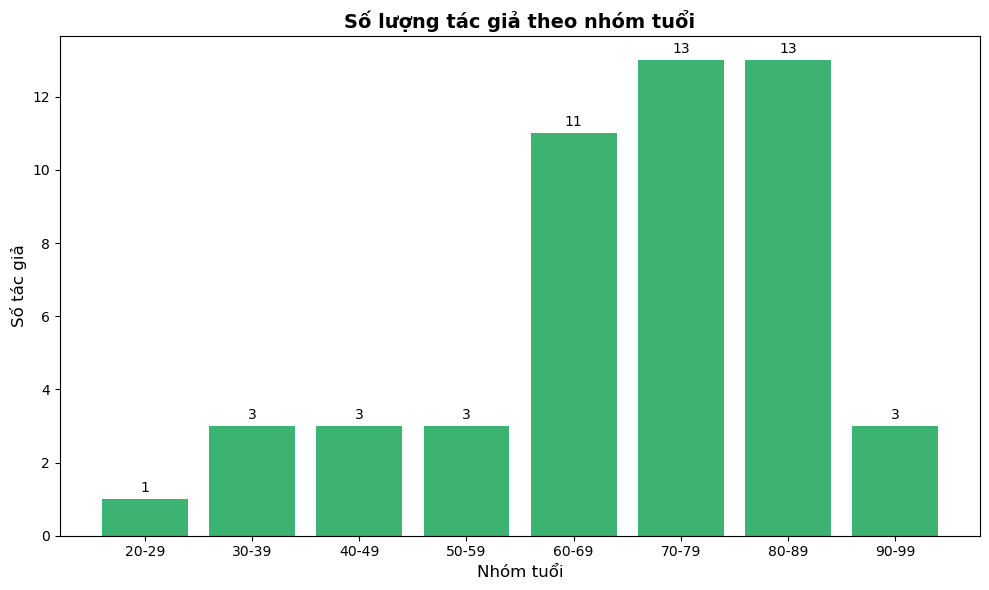

In [314]:
so_tac_gia = ds_tac_gia_nhom['Nhóm tuổi'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bar = plt.bar(so_tac_gia.index, so_tac_gia.values, color='mediumseagreen')
plt.title('Số lượng tác giả theo nhóm tuổi', fontsize=14, fontweight='bold')
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Số tác giả', fontsize=12)

for b in bar:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height + 0.2, str(height), ha='center')
plt.tight_layout()
plt.show()

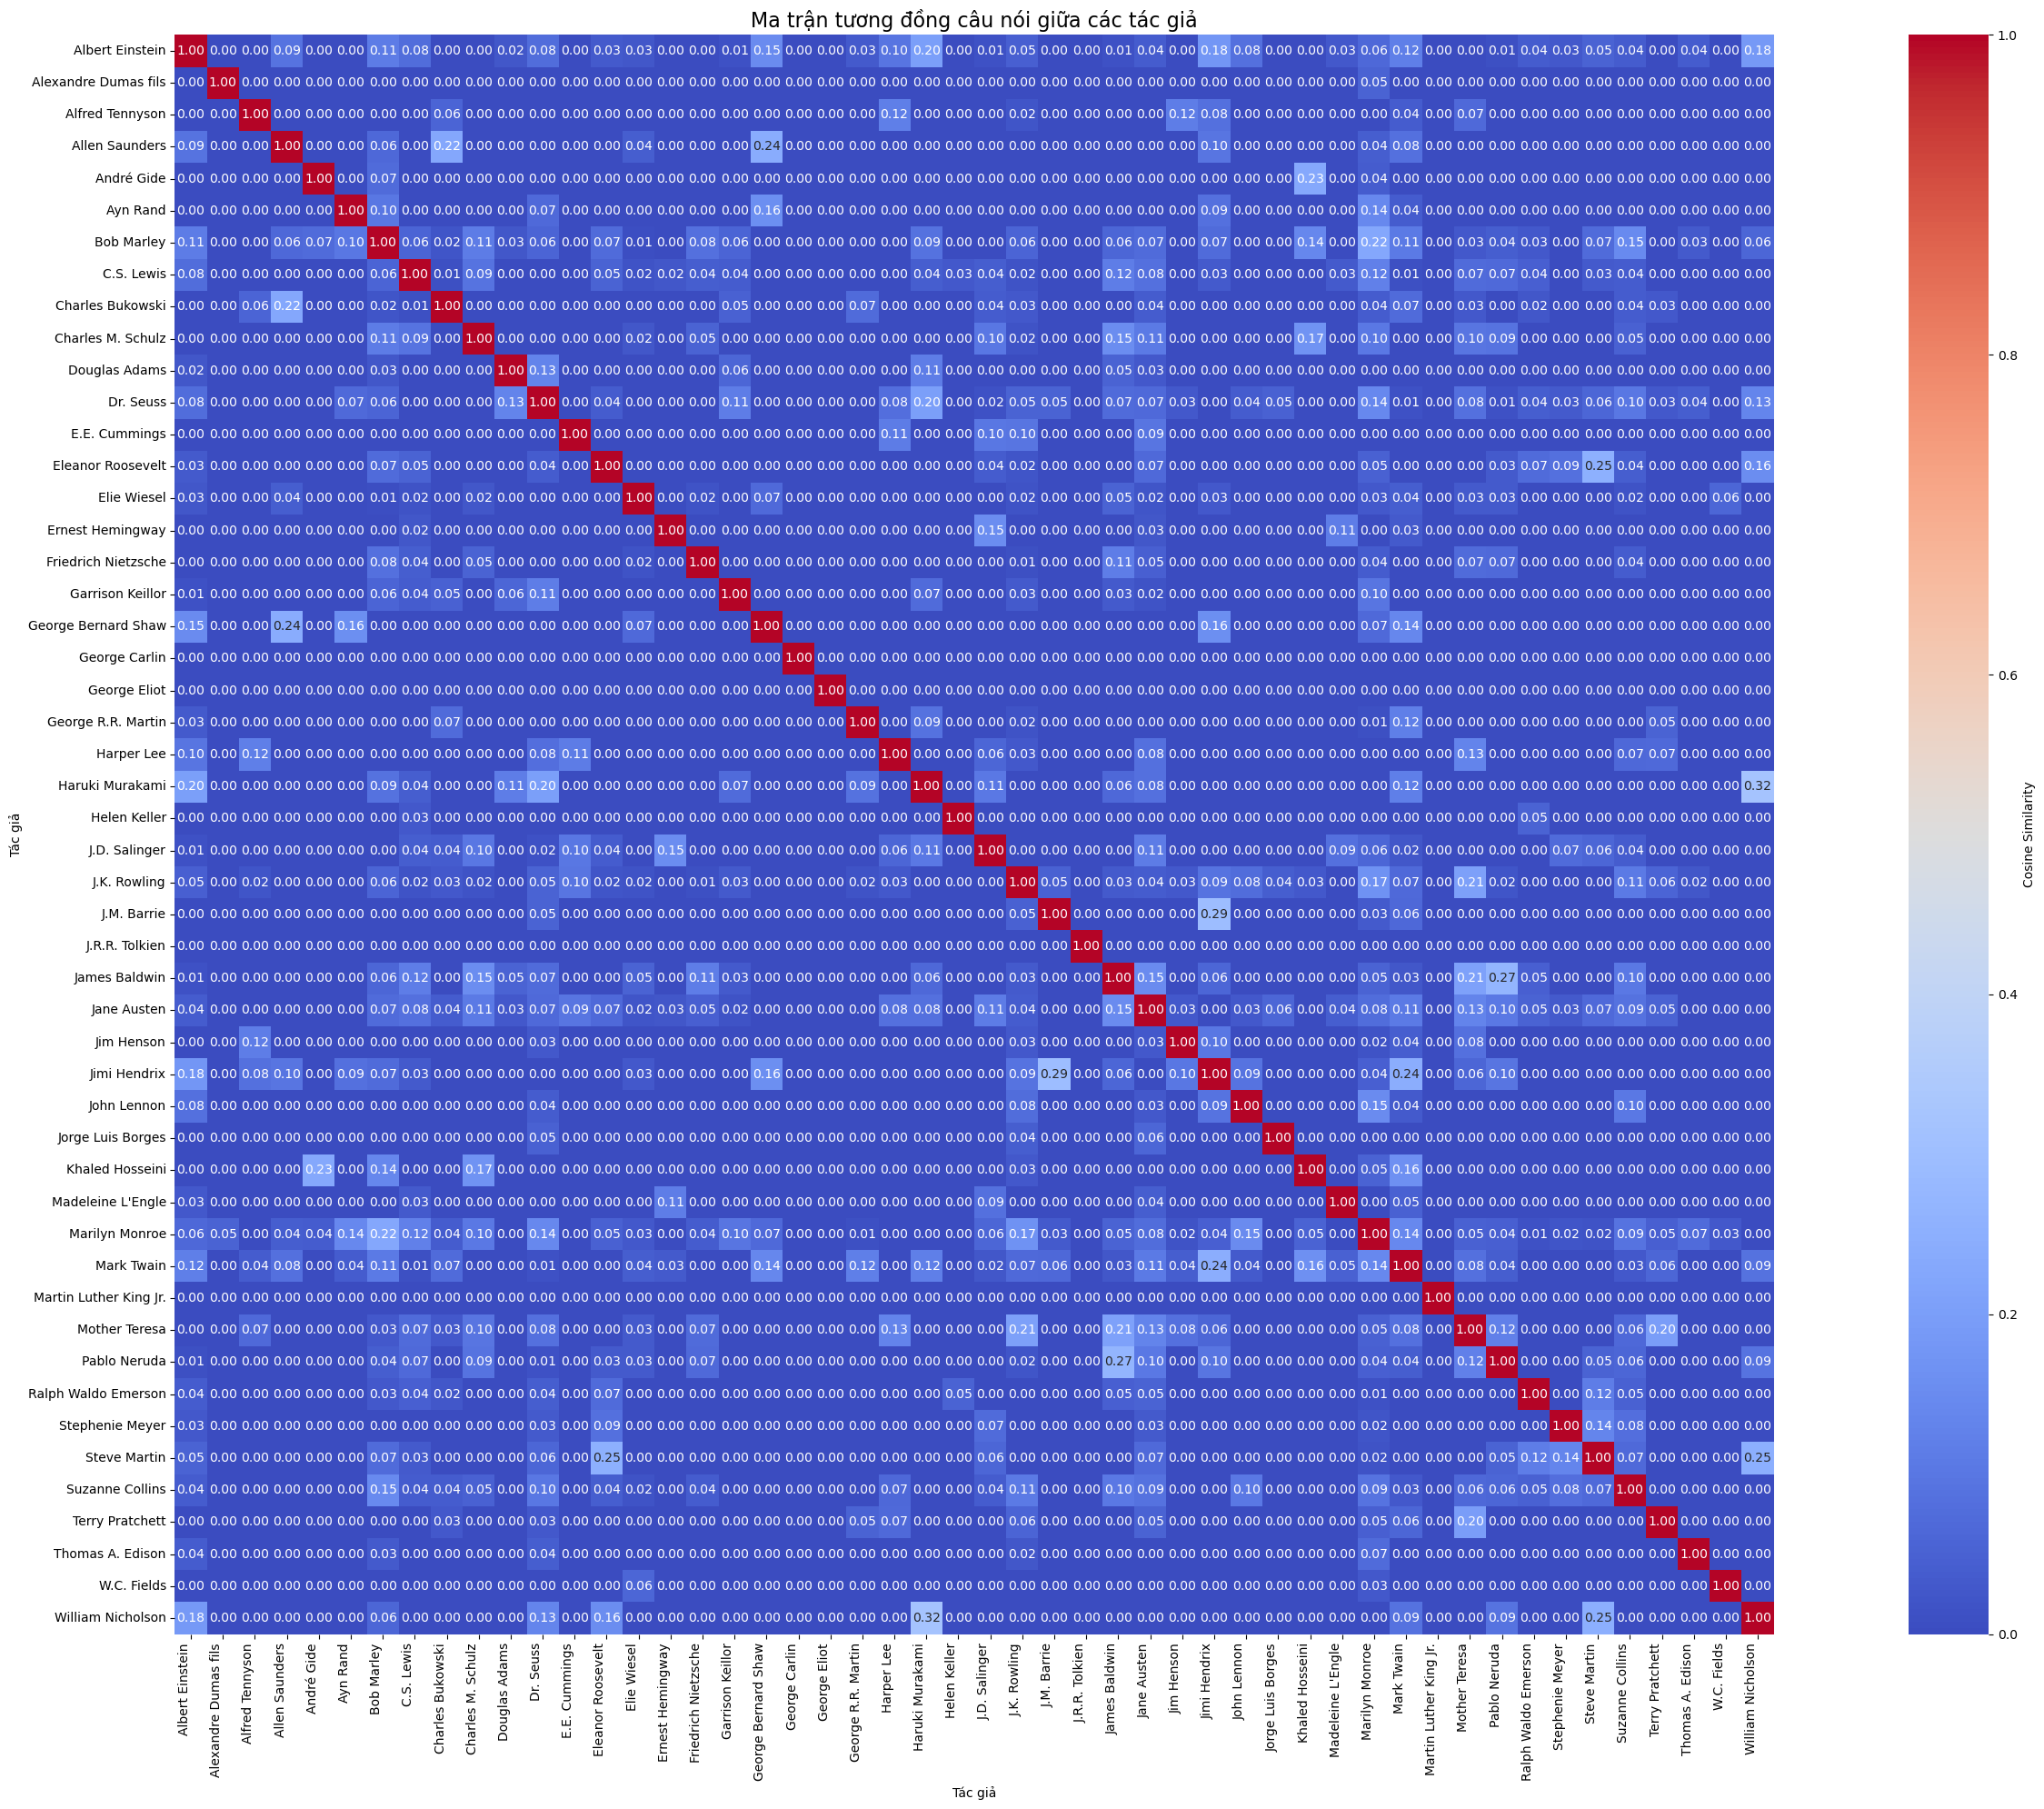

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Gom nhóm câu nói theo tác giả
nhom_tac_gia = df_data_1.groupby('Tác giả')['Câu nói'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Tính TF-IDF vector cho từng tác giả
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(nhom_tac_gia['Câu nói'])

# Ma trận tương đồng cosine giữa các tác giả
similarity_matrix = cosine_similarity(tfidf_matrix)

# Chuyển thành DataFrame cho dễ trực quan
df_similarity = pd.DataFrame(similarity_matrix, index=nhom_tac_gia['Tác giả'], columns=nhom_tac_gia['Tác giả'])

plt.figure(figsize=(30,20))
sns.heatmap(df_similarity, cmap='coolwarm', annot=True, fmt=".2f", square=True,
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Ma trận tương đồng câu nói giữa các tác giả', fontsize=16)
plt.xticks(ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [318]:
!pip install wordcloud

Top 5 tác giả – Họ dùng những từ gì nhiều nhất?


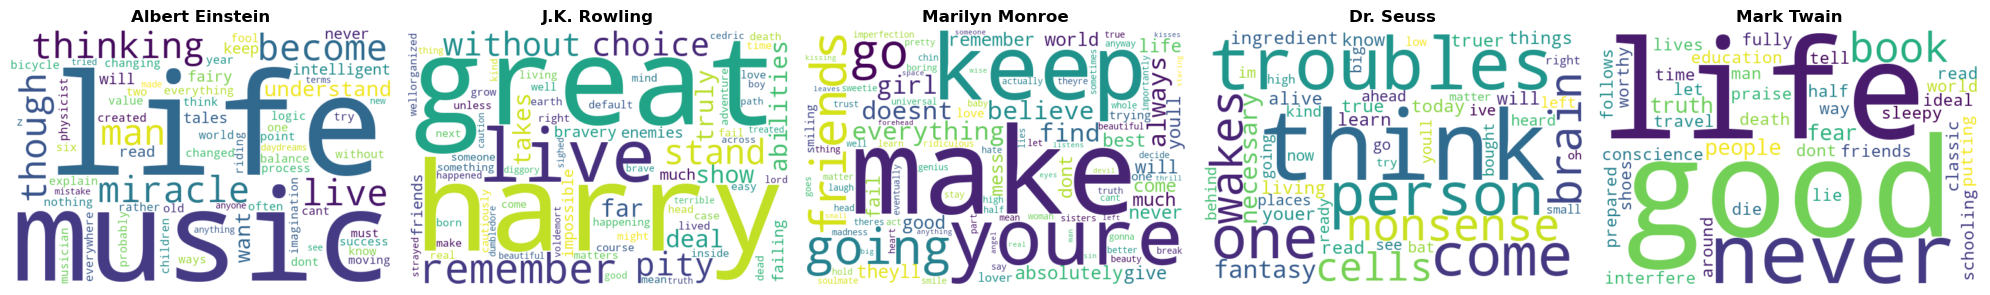

In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from collections import Counter
from wordcloud import WordCloud

tac_gia_cau_noi = df_data_1[['Tác giả', 'Câu nói']].dropna()
nhom_tac_gia = tac_gia_cau_noi.groupby('Tác giả')['Câu nói'].apply(lambda x: ' '.join(x)).reset_index()

# Lấy 5 tác giả có nhiều câu nói nhất
tac_gia_nhieu_nhat = df_data_1['Tác giả'].value_counts().head(5).index.tolist()
print("Top 5 tác giả – Họ dùng những từ gì nhiều nhất?")
# Tạo WordCloud cho từng tác giả
plt.figure(figsize=(20, 6))
for i, tg in enumerate(tac_gia_nhieu_nhat, 1):
    cau_noi = nhom_tac_gia[nhom_tac_gia['Tác giả'] == tg]['Câu nói'].values[0].lower()
    for dau_cau in string.punctuation:
        cau_noi = cau_noi.replace(dau_cau, '')
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(cau_noi)
    plt.subplot(1, 5, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(tg, fontsize=12, fontweight='bold')   

plt.tight_layout()
plt.show()

### 3.2.3. Trích xuất đặc trưng- Feature Extraction (3 điểm):  
#### Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải thích cách làm của bạn.  

##### - Các đặc trưng trích xuất:
**1. Chiều dài câu (len_chars):** Đo độ dài trung bình của câu nói tính theo số ký tự.\
**2. Số lượng từ (len_words):** Đếm số từ trong câu nói.\
**3. Độ dài từ trung bình (avg_word_length):** Tính trung bình độ dài của các từ trong câu.\
**4. TF-IDF Vector (Term Frequency - Inverse Document Frequency):** Biểu diễn câu nói dưới dạng vector số dựa trên tần suất xuất hiện từ khóa trong toàn bộ dữ liệu.
##### - Lý do chọn các đặc trưng này:
1. Kết hợp đặc trưng numeric và text: Các đặc trưng độ dài câu và từ mang tính định lượng, giúp mô hình học được phong cách câu nói (ví dụ tác giả A thường nói câu dài, tác giả B dùng từ ngắn).TF-IDF biểu diễn nội dung câu nói một cách có ý nghĩa dưới dạng vector số.
2. TF-IDF giúp chuyển câu nói thành dạng số học:
Đây là bước quan trọng để các mô hình máy học hoặc phân tích số có thể xử lý dữ liệu text một cách hiệu quả, tập trung vào các từ khóa mang thông tin phân biệt cao.

In [410]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Tính chiều dài câu (số ký tự)
df_data_1['Do_dai_cau'] = df_data_1['Câu nói'].apply(lambda x: len(str(x)))

# Tính số từ trong câu
df_data_1['So_tu'] = df_data_1['Câu nói'].apply(lambda x: len(str(x).split()))

# Tính độ dài từ trung bình của câu
def avg_word_len(text):
    words = str(text).split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

df_data_1['Do_dai_tu_tb'] = df_data_1['Câu nói'].apply(avg_word_len)

# Trích xuất TF-IDF vector từ cột 'Câu nói'
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Giới hạn 1000 từ phổ biến nhất
tfidf_matrix = tfidf_vectorizer.fit_transform(df_data_1['Câu nói'].fillna(''))

# tfidf_matrix là ma trận sparse (số câu nói x số đặc trưng từ)
# Chuyển ma trận TF-IDF thành DataFrame dễ thao tác
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_full = pd.concat([df_data_1.reset_index(drop=True), df_tfidf.reset_index(drop=True)], axis=1)

print(df_full.head())

   STT          Tác giả                                               Link  \
0    1  Albert Einstein  http://quotes.toscrape.com/author/Albert-Einstein   
1    2     J.K. Rowling      http://quotes.toscrape.com/author/J-K-Rowling   
2    3  Albert Einstein  http://quotes.toscrape.com/author/Albert-Einstein   
3    4      Jane Austen      http://quotes.toscrape.com/author/Jane-Austen   
4    5   Marilyn Monroe   http://quotes.toscrape.com/author/Marilyn-Monroe   

   Ngày sinh                                            Câu nói  Tuổi  \
0 1879-03-14  “The world as we have created it is a process ...    76   
1 1965-07-31  “It is our choices, Harry, that show what we t...    60   
2 1879-03-14  “There are only two ways to live your life. On...    76   
3 1775-12-16  “The person, be it gentleman or lady, who has ...    42   
4 1926-06-01  “Imperfection is beauty, madness is genius and...    36   

   Độ dài câu  Số từ Nhóm tuổi  Do_dai_cau  ...  worth  worthy  wrap  write  \
0         115

### 3.2.4. Suy luận (10 điểm):  Bạn được yêu cầu phân loại câu nói theo tên người nổi tiếng và tính độ tương đồng phong cách nói giữa các tác giả theo 2 yêu cầu sau:

#### - Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù hợp? (5 điểm)

In [414]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Label y là tên tác giả
y = df_data_1['Tác giả']  

# Đặc trưng đầu vào X là ma trận TF-IDF
X_tfidf = tfidf_matrix  

# Chia dữ liệu thành tập Train (80%) và Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Dự đoán tên tác giả trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá kết quả mô hình
print("\n=== Đánh giá mô hình phân loại tác giả ===")
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại (Classification Report):\n", classification_report(y_test, y_pred, zero_division=0))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))


=== Đánh giá mô hình phân loại tác giả ===
Độ chính xác (Accuracy): 0.1

Báo cáo phân loại (Classification Report):
                  precision    recall  f1-score   support

Albert Einstein       0.00      0.00      0.00         5
Alfred Tennyson       0.00      0.00      0.00         1
      Dr. Seuss       0.00      0.00      0.00         2
   George Eliot       0.00      0.00      0.00         1
   J.K. Rowling       0.10      1.00      0.18         2
    Jane Austen       0.00      0.00      0.00         1
    John Lennon       0.00      0.00      0.00         1
 Marilyn Monroe       0.00      0.00      0.00         3
     Mark Twain       0.00      0.00      0.00         1
  Mother Teresa       0.00      0.00      0.00         2
    W.C. Fields       0.00      0.00      0.00         1

       accuracy                           0.10        20
      macro avg       0.01      0.09      0.02        20
   weighted avg       0.01      0.10      0.02        20


Ma trận nhầm lẫn (Confu

#### - Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất? (5 điểm)

In [417]:
# GỘP CÂU NÓI THEO TÁC GIẢ 
df_grouped = df_data_1.groupby('Tác giả')['Câu nói'].apply(lambda x: ' '.join(x)).reset_index()

# TF-IDF cho mỗi tác giả
tfidf_authors = TfidfVectorizer(max_features=500, stop_words='english')
X_authors = tfidf_authors.fit_transform(df_grouped['Câu nói'])

# Tính ma trận độ tương đồng (cosine similarity)
similarity_matrix = cosine_similarity(X_authors)
similarity_df = pd.DataFrame(similarity_matrix, index=df_grouped['Tác giả'], columns=df_grouped['Tác giả'])

print("\n=== Ma trận độ tương đồng phong cách giữa các tác giả ===")
print(similarity_df.round(2))

# Tìm hai tác giả giống nhau nhất
def find_most_similar_pair(sim_df):
    max_sim = -1
    best_pair = (None, None)
    for i in range(len(sim_df)):
        for j in range(i + 1, len(sim_df)):
            sim = sim_df.iloc[i, j]
            if sim > max_sim:
                max_sim = sim
                best_pair = (sim_df.index[i], sim_df.columns[j])
    return best_pair + (max_sim,)

a1, a2, sim = find_most_similar_pair(similarity_df)
print(f"\nHai tác giả có phong cách giống nhau nhất: {a1} và {a2} (độ tương đồng = {sim:.2f})")



=== Ma trận độ tương đồng phong cách giữa các tác giả ===
Tác giả                 Albert Einstein  Alexandre Dumas fils  \
Tác giả                                                         
Albert Einstein                    1.00                  0.00   
Alexandre Dumas fils               0.00                  1.00   
Alfred Tennyson                    0.00                  0.00   
Allen Saunders                     0.09                  0.00   
André Gide                         0.00                  0.00   
Ayn Rand                           0.00                  0.00   
Bob Marley                         0.11                  0.00   
C.S. Lewis                         0.08                  0.00   
Charles Bukowski                   0.00                  0.00   
Charles M. Schulz                  0.00                  0.00   
Douglas Adams                      0.02                  0.00   
Dr. Seuss                          0.08                  0.00   
E.E. Cummings                  